# Module 2 Final Project Specifications

## Introduction

In this lesson, we'll review all the guidelines and specifications for the final project for Module 2. 

## Objectives

* Understand all required aspects of the Final Project for Module 2
* Understand all required deliverables
* Understand what constitutes a successful project

### Final Project Summary

Another module down--you're half way there!

<img src='halfway-there.gif'>

For the culmination of Module 2, you just need to complete the final project!

### The Project

For this project, you'll be working with the Northwind database--a free, open-source dataset created by Microsoft containing data from a fictional company. You probably remember the Northwind database from our section on Advanced SQL. Here's the schema for the Northwind database:

<img src='Northwind_ERD.png'>

The goal of this project is to test your ability to gather information from a real-world database and use your knowledge of statistical analysis and hypothesis testing to generate analytical insights that can be of value to the company. 

## The Deliverables

The goal of your project is to query the database to get the data needed to perform a statistical analysis.  In this statistical analysis, you'll need to perform a hypothesis test (or perhaps several) to answer the following question:

**_Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?_**

In addition to answering this question with a hypothesis test, you will also need to come up with **_at least 3 other hypotheses to test on your own_**.  These can by anything that you think could be imporant information for the company. 

For this hypothesis, be sure to specify both the **_null hypothesis_** and the **_alternative hypothesis_** for your question.  You should also specify if this is one-tail or a two-tail test. 

To complete this project, you will need to turn in the following 3 deliverables:

1. A **_Jupyter Notebook_** containing any code you've written for this project. 
2. A **_Blog Post_** explaining your process, methodology, and findings.  
3. An **_"Executive Summary" PowerPoint Presentation_** that explains the hypothesis tests you ran, your findings, and their relevance to company stakeholders.  

### Jupyter Notebook Must-Haves

For this project, your jupyter notebook should meet the following specifications:

**_Organization/Code Cleanliness_**

* The notebook should be well organized, easy to follow, and code is commented where appropriate.  
<br>  
    * Level Up: The notebook contains well-formatted, professional looking markdown cells explaining any substantial code. All functions have docstrings that act as professional-quality documentation.  
<br>      
* The notebook is written to technical audiences with a way to both understand your approach and reproduce your results. The target audience for this deliverable is other data scientists looking to validate your findings.  
<br>    
* Any SQL code written to source data should also be included.  

**_Findings_**

* Your notebook should clearly show how you arrived at your results for each hypothesis test, including how you calculated your p-values.   
<br>
* You should also include any other statistics that you find relevant to your analysis, such as effect size. 

### Blog Post Must-Haves

Your blog post should include everything from how you identified what tables contained the information you need, to how you retrieved it using SQL (and any challenges you ran into while doing so), as well as your methodology and results for your hypothesis tests. 

**_NOTE:_**  This blog post is your way of showcasing the work you've done on this project--chances are it will soon be read by a recruiter or hiring manager! Take the time to make sure that you craft your story well, and clearly explain your process and findings in a way that clearly shows both your technical expertise **_and_** your ability to communicate your results!

### Executive Summary Must-Haves

Your presentation should:

* Contain between 5-10 professional quality slides detailing:
<br>  
    * A high-level overview of your methodology  
    <br>  
    * The results of your hypothesis tests  
    <br>  
    * Any real-world recommendations you would like to make based on your findings (ask yourself--why should the executive team care about what you found? How can your findings help the company?)  
    <br>  
* Take no more than 5 minutes to present  
<br>  
* Avoid technical jargon and explain results in a clear, actionable way for non-technical audiences.  

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn 
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [3]:
engine = create_engine("sqlite:///Northwind_small.sqlite")
inspector = inspect(engine)
print(inspector.get_table_names())

['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [4]:
df1 = pd.read_sql_query('''SELECT * FROM OrderDetail;''', engine) #For discounts question 
print('Rows and Columns:\n', df1.shape,'\n\n', '********************\n\n')
print( df1.info(), '\n\n', '********************\n\n')
print('Dataframe Head\n', df1.head())

Rows and Columns:
 (2155, 6) 

 ********************


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB
None 

 ********************


Dataframe Head
          Id  OrderId  ProductId  UnitPrice  Quantity  Discount
0  10248/11    10248         11       14.0        12       0.0
1  10248/42    10248         42        9.8        10       0.0
2  10248/72    10248         72       34.8         5       0.0
3  10249/14    10249         14       18.6         9       0.0
4  10249/51    10249         51       42.4        40       0.0


In [5]:
df = pd.read_sql_query("""SELECT o.ID, c.CompanyName, Count(*) num_orders FROM [Order] \
o INNER JOIN Customer c on o.CustomerID = c.ID GROUP BY c.CompanyName ORDER BY num_orders DESC""", engine)
df.head(10)

,Id,CompanyName,num_orders
0,11064,Save-a-lot Markets,31
1,11072,Ernst Handel,30
2,11021,QUICK-Stop,28
3,11050,Folk och fä HB,19
4,11063,Hungry Owl All-Night Grocers,19
5,10924,Berglunds snabbköp,18
6,11055,HILARION-Abastos,18
7,11077,Rattlesnake Canyon Grocery,18
8,11076,Bon app,17
9,11012,Frankenversand,15


In [6]:
df = pd.read_sql_query('''SELECT * FROM Product;''', engine) 
df.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [7]:
df = pd.read_sql_query('''SELECT * FROM Customer;''', engine)
df.head()

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [8]:
df = pd.read_sql_query('''SELECT * FROM Supplier;''', engine)
df.head()

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None


In [9]:
df = pd.read_sql_query('''SELECT * FROM Territory;''', engine)
df.head(10)

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1
5,02184,Braintree,1
6,02903,Providence,1
7,03049,Hollis,3
8,03801,Portsmouth,3
9,06897,Wilton,1


In [10]:
df = pd.read_sql_query('''SELECT * FROM [Order];''', engine)
df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [11]:
df2 = pd.read_sql_query('''SELECT c.Id customer_id, o.Id order_id,
                            od.Quantity quantity, od.UnitPrice unit_price, od.discount discount
                            FROM OrderDetail od 
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Customer c ON o.CustomerId = c.Id
                            ;''', engine)
print('Rows and Columns:\n', df2.shape,'\n\n', '********************\n\n')
print( df2.info(), '\n\n', '********************\n\n')
print('Dataframe Head\n', df2.head())

Rows and Columns:
 (2078, 5) 

 ********************


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 5 columns):
customer_id    2078 non-null object
order_id       2078 non-null int64
quantity       2078 non-null int64
unit_price     2078 non-null float64
discount       2078 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 81.2+ KB
None 

 ********************


Dataframe Head
   customer_id  order_id  quantity  unit_price  discount
0       VINET     10248        12        14.0       0.0
1       VINET     10248        10         9.8       0.0
2       VINET     10248         5        34.8       0.0
3       TOMSP     10249         9        18.6       0.0
4       TOMSP     10249        40        42.4       0.0


In [12]:
# multiplying quantity and unit price to get a column with gross spending
df2['spend_gross'] = np.multiply(df2['quantity'], df2['unit_price'])
df2.head()

,customer_id,order_id,quantity,unit_price,discount,spend_gross
0,VINET,10248,12,14.0,0.0,168.0
1,VINET,10248,10,9.8,0.0,98.0
2,VINET,10248,5,34.8,0.0,174.0
3,TOMSP,10249,9,18.6,0.0,167.4
4,TOMSP,10249,40,42.4,0.0,1696.0


In [13]:
df1_category = pd.read_sql_query('''SELECT * FROM Category;''', engine)
df1_category.head(10)

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


In [14]:
df = pd.read_sql_query('''

                                SELECT O.OrderDate, OD.Quantity, OD.Discount, CategoryId FROM [Order] AS O
                                JOIN OrderDetail AS OD
                                ON O.Id = OD.OrderId
                                JOIN Product
                                ON Product.Id = OD.ProductId
                                

''',engine)
print('Rows and Columns:\n', df.shape,'\n\n', '********************\n\n')
print( df.info(), '\n\n', '********************\n\n')
print('Dataframe Head\n', df.head(20))

Rows and Columns:
 (2155, 4) 

 ********************


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 4 columns):
OrderDate     2155 non-null object
Quantity      2155 non-null int64
Discount      2155 non-null float64
CategoryId    2155 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 67.4+ KB
None 

 ********************


Dataframe Head
      OrderDate  Quantity  Discount  CategoryId
0   2012-07-04        12      0.00           4
1   2012-07-04        10      0.00           5
2   2012-07-04         5      0.00           4
3   2012-07-05         9      0.00           7
4   2012-07-05        40      0.00           7
5   2012-07-08        10      0.00           8
6   2012-07-08        35      0.15           7
7   2012-07-08        15      0.15           2
8   2012-07-08         6      0.05           5
9   2012-07-08        15      0.05           5
10  2012-07-08        20      0.00           2
11  2012-07-09        40  

In [15]:
df.OrderDate = pd.to_datetime(df.OrderDate)
df['Month'] = df.OrderDate.dt.month
df.head()


,OrderDate,Quantity,Discount,CategoryId,Month
0,2012-07-04,12,0.0,4,7
1,2012-07-04,10,0.0,5,7
2,2012-07-04,5,0.0,4,7
3,2012-07-05,9,0.0,7,7
4,2012-07-05,40,0.0,7,7


In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

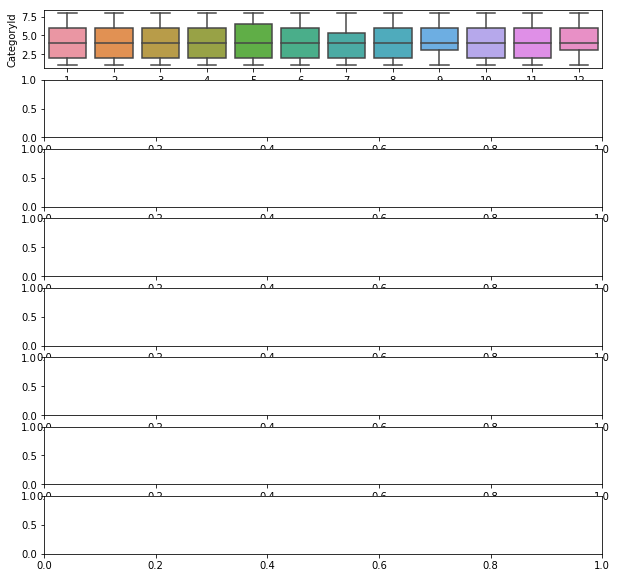

In [21]:
fig, axes = plt.subplots(8, figsize=(10,10))
for name, ax in zip(['CategoryId'], axes):
    sns.boxplot(data=df, x='Month', y=name, ax=ax)

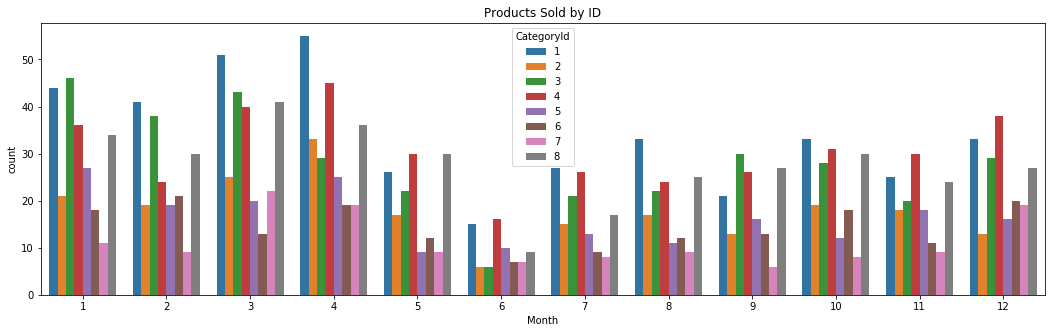

In [22]:


fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(x='Month',
              data=df,
              hue = 'CategoryId')
plt.title('Products Sold by ID')
plt.show()

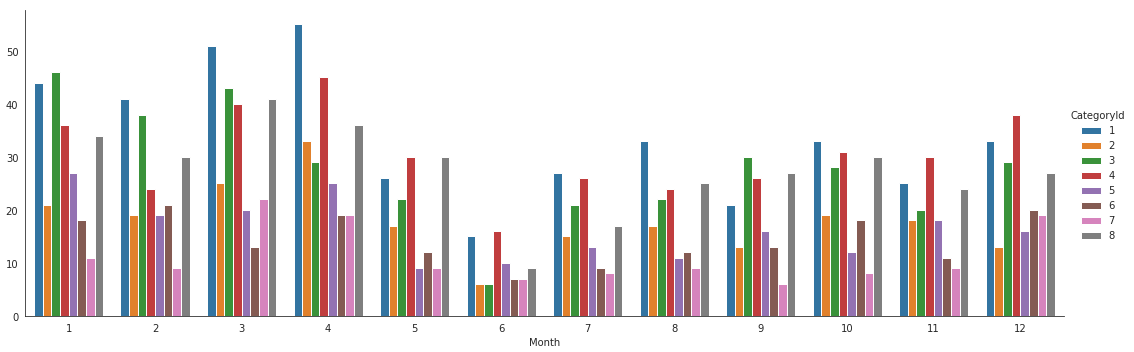

In [26]:
with sns.axes_style('white'):
    g = sns.factorplot("Month", data=df, aspect=3.0, kind='count',
                       hue='CategoryId', order=range(1, 13))
    g.set_ylabels('')

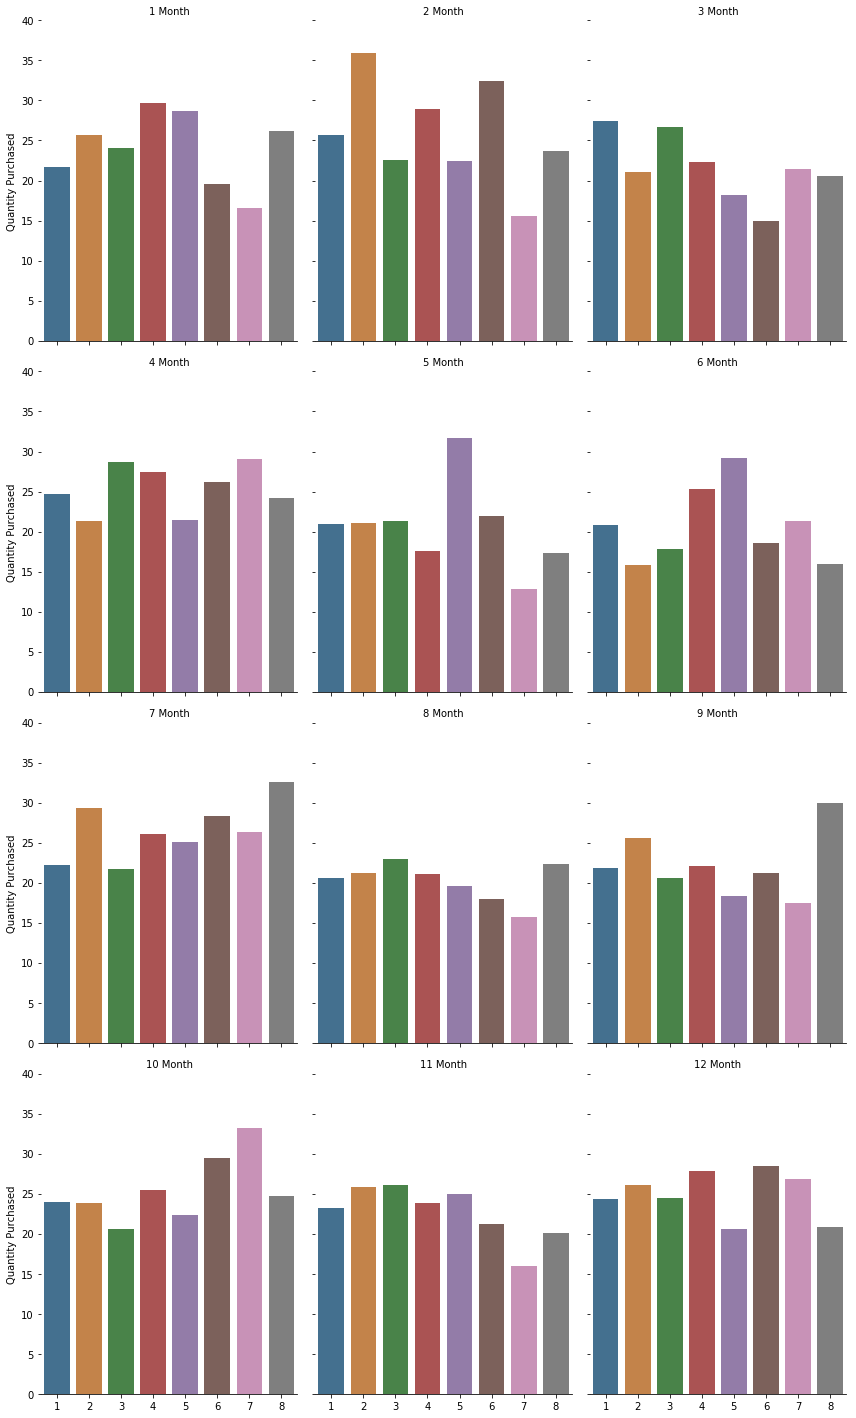

In [53]:
g = sns.catplot(x="CategoryId", y="Quantity", col="Month",
                 data=df, saturation=.5,
                 kind="bar", ci=None, aspect=.8, col_wrap=3.0)
(g.set_axis_labels("", "Quantity Purchased")
   .set_xticklabels(["1", "2", "3", "4", "5", "6", "7", "8"])
   .set_titles("{col_name} {col_var}")
   .set(ylim=(0, 40))
   .despine(left=True))  

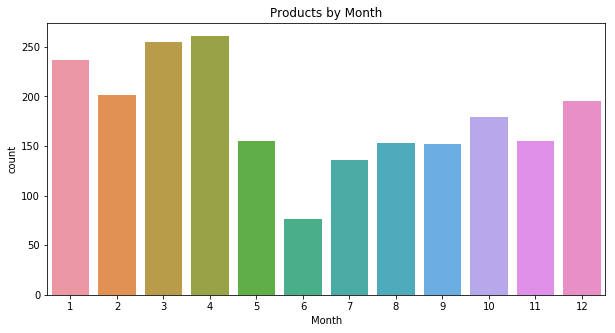

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Month',
              data=df)
plt.title('Products by Month')
plt.show()

In [55]:
categories = ['1','2','3','4','5','6','7','8','9']
for cat in categories:
    subset = df[df.CategoryId == cat]
    sns.distplot(subset['Month'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = id)
plt.legend(prop={'size': 16}, title = 'Product Categories')
plt.title('Monthly Category Sales')
plt.xlabel('Months')
plt.ylabel('Quantity')

TypeError: invalid type comparison

NameError: name 'df1_new' is not defined

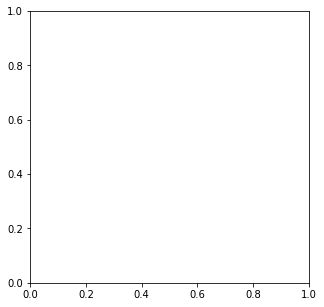

In [23]:
fig, ax = plt.subplots(figsize=(5,5)) #Use for analysis of which discount is best #create a box plot instead just discounts
sns.countplot(x='Discount',
              data=df1_new)
plt.title('Total Products Sold')
plt.show()

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(x='',
              data=df1_new,
              hue = 'islong')
plt.title('Products Sold by ID')
plt.show()

In [24]:
df = pd.read_sql_query('''SELECT DISTINCTROW TOP 10 Products.[Product Name] AS [Ten Most Expensive Products], Products.[Unit Price]

FROM Products

ORDER BY Products.[Unit Price] DESC;''', engine)
df.head()

OperationalError: (sqlite3.OperationalError) near "10": syntax error
[SQL: SELECT DISTINCTROW TOP 10 Products.[Product Name] AS [Ten Most Expensive Products], Products.[Unit Price]

FROM Products

ORDER BY Products.[Unit Price] DESC;]
(Background on this error at: http://sqlalche.me/e/e3q8)